In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import rc

In [2]:

# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# plt.rcParams["font.family"] = "serif"# rc('text', usetex=True)

In [3]:
data = pd.read_excel("data.xlsx",header=6,usecols="B,E,F",nrows=29).dropna()

In [4]:
data

,Thickness (mm),Count rate,Corrected Rate
0,0.000000,8.855556,8.574444
2,1.110000,1.208333,0.927222
4,2.226667,1.150000,0.868889
6,3.333333,1.037500,0.756389
8,4.366667,1.145833,0.864722
10,5.416667,0.916667,0.635556
12,5.326667,0.841667,0.560556
14,6.436667,0.850000,0.568889
16,7.553333,0.791667,0.510556
18,8.660000,0.829167,0.548056


In [5]:
thick = np.array(data["Thickness (mm)"][1:])
count_rate = np.array(data["Count rate"][1:])
corrected_rate = np.array(data["Corrected Rate"][1:])

In [6]:
def f(x,a,b):
    return a*x+b    

In [7]:
param,paramcov = curve_fit(f, thick, np.log(count_rate))
print(param)
x = np.linspace(thick[0],thick[-1],1000)
y = f(x, *param)
perr = np.sqrt(np.diag(paramcov))
perr

[-0.06162765  0.26305147]


array([0.00573457, 0.04548936])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


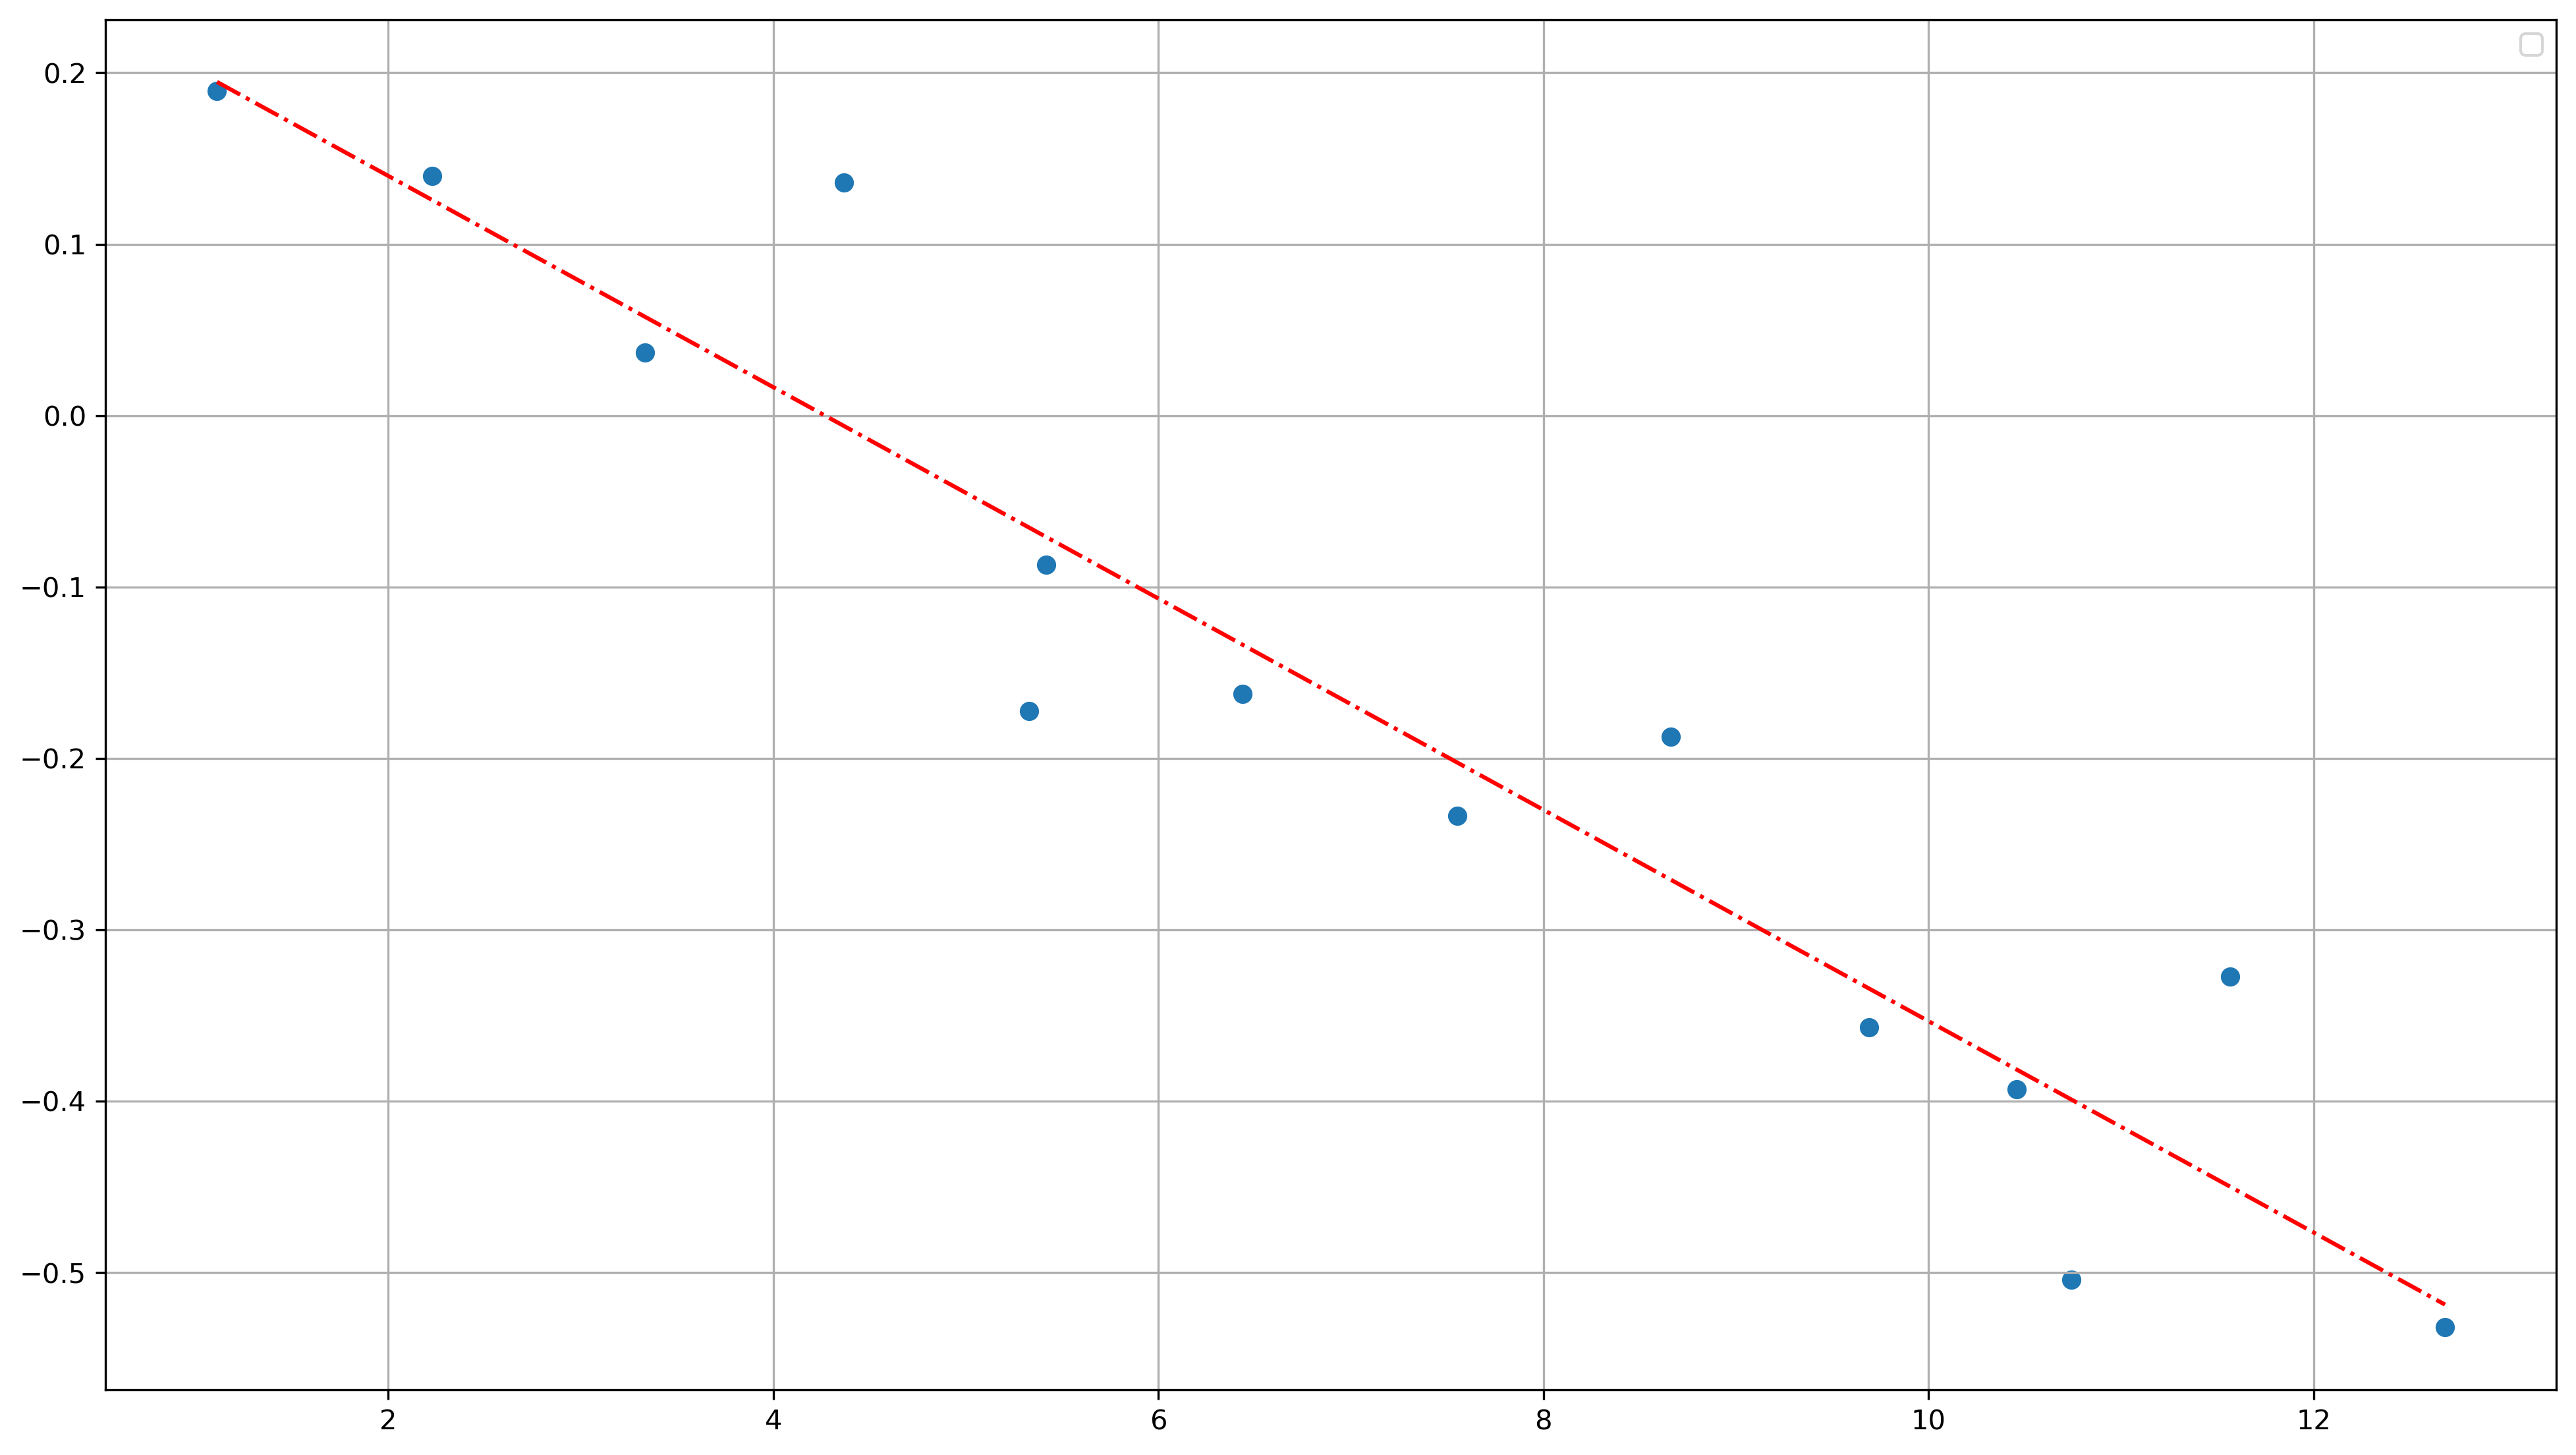

In [8]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
axes.plot(x,y,'r-.')
axes.grid()
axes.legend()
axes.scatter(thick, np.log(count_rate))

In [9]:
param1,paramcov1 = curve_fit(f, thick, np.log(corrected_rate))
print(param1)
x1 = np.linspace(thick[0],thick[-1],1000)
y1 = f(x, *param1)
perr1 = np.sqrt(np.diag(paramcov1))
perr1

[-0.0935731   0.06219076]


array([0.00890454, 0.07063503])

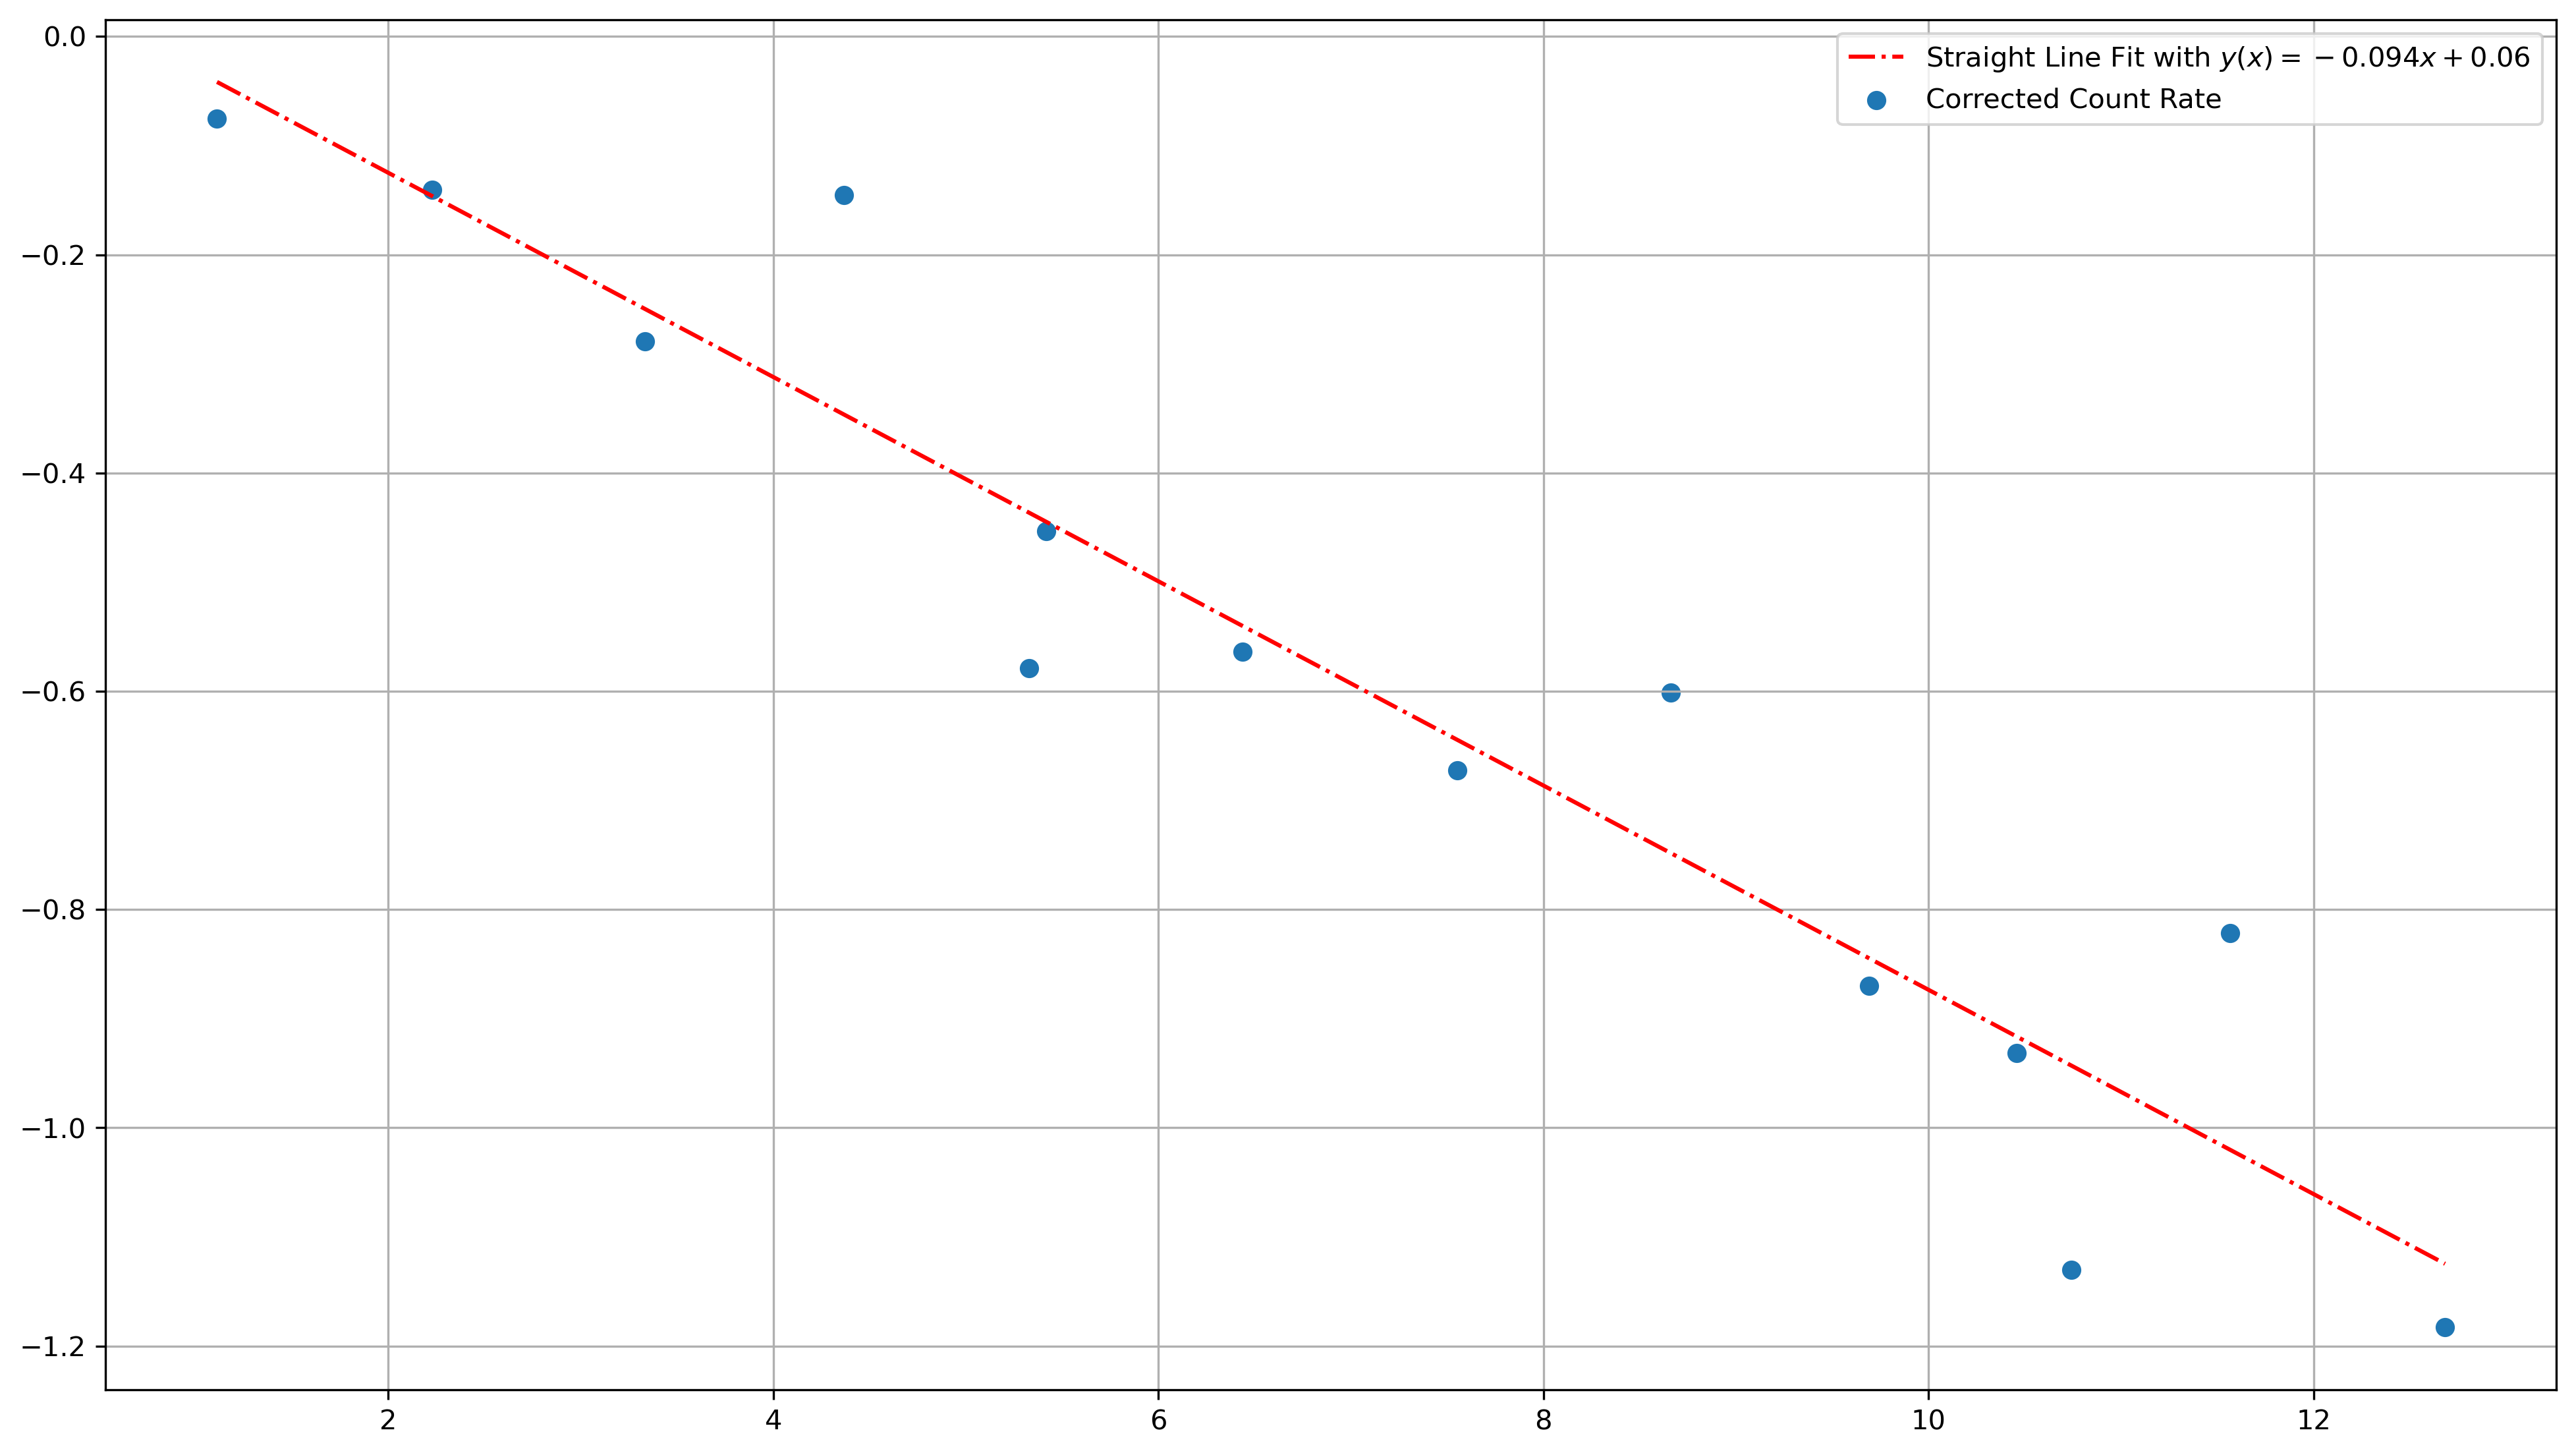

In [10]:
fig, axes = plt.subplots(1,1, figsize=(16,9),dpi=300)
font = {}
axes.plot(x1,y1,'r-.', label=r"Straight Line Fit with $y(x) = -0.094x + 0.06$ ")
# axes.plot(x,y,'r-.')
axes.scatter(thick, np.log(corrected_rate), label="Corrected Count Rate")
# axes.scatter(thick, np.log(count_rate))
# axes.scatter(thick, np.log(count_rate-0.281))
axes.legend()
axes.grid()

In [12]:
datainv = pd.read_excel("gmd.xlsx",sheet_name=1,header=6,usecols="B,E,F",nrows=29).dropna()


FileNotFoundError: [Errno 2] No such file or directory: 'gmd.xlsx'